In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.measurement


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent = session.query(func.max(measurement.date)).all()
most_recent

[('2017-08-23',)]

<AxesSubplot:xlabel='Date'>

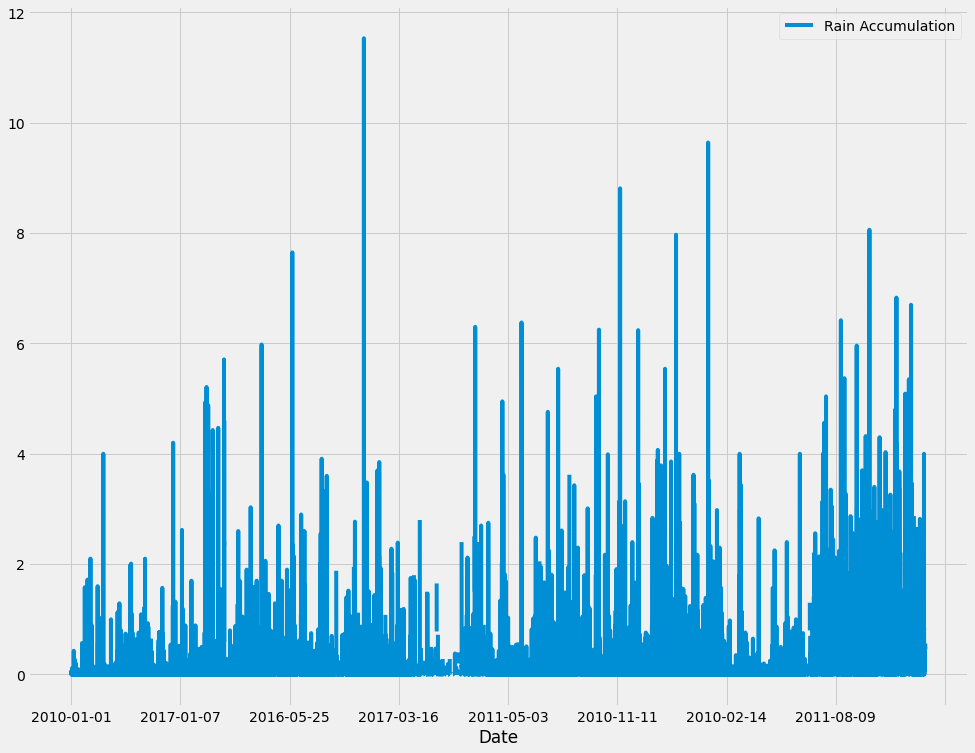

In [37]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
rain = dt.datetime(2017, 8, 23)
# Calculate the date one year from the last date in data set.
year = rain - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(measurement.date, measurement.prcp)

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_col = [{"Date": result[0], "Rain Accumulation": result[1]} for result in precip]
precip_df = pd.DataFrame(precip_col)
precip_df = precip_df.set_index('Date')

# Sort the dataframe by date
precip_df.groupby('Date')

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(figsize=(15,12))

In [49]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Rain Accumulation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(station.station).group_by(station.station).nunique()
stations

AttributeError: 'Query' object has no attribute 'nunique'

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(station.station, func.count(station.id)).group_by(station.station).order_by(func.count(station.id).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [70]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active = session.query(station.station, func.count(station.id))[0]
active.meaurement.tobs.max()
active.measurement.tobs.min()
active.measurement.tobs.mean()

AttributeError: Could not locate column in row for column 'meaurement'

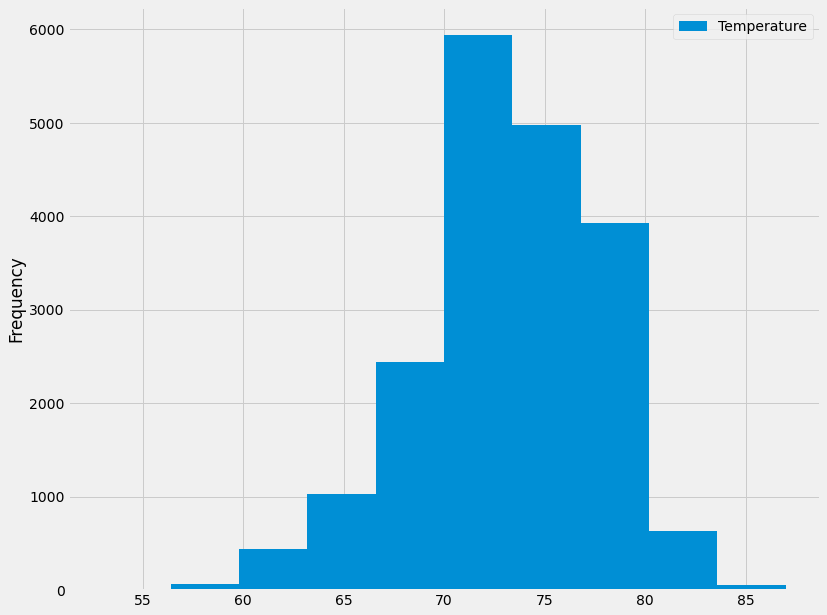

In [74]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature = session.query(measurement.tobs)
temp2 = [{'Temperature': result[0]} for result in temperature]
temp_df = pd.DataFrame(temp2)
ax = temp_df.plot.hist(figsize=(12,10))

# Close session

In [75]:
# Close Session
session.close()